Problem Statement No. 04 <br>
Consider the Bangalore House Price Data. Perform following operations.
a) Find and replace null values in the data using appropriate technique.
b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of
the range to be taken.
d) Calculate and add one more column as ‘Price_Per_Sqft’
e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.
f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean
Squared Error and Accuracy

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
df = pd.read_csv('data/Banglore_Housing_Prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [104]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [105]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [106]:
# a)
# M1: just drop all rows with null!
# df.dropna(inplace=True)

# M2:
df['location'] = df['location'].fillna(df['location'].mode().iloc[0])
df['size'] = df['size'].fillna(df['size'].mode().iloc[0])
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [107]:
# b)
df['size'] = df['size'].apply(lambda x: int(x.split()[0]))
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [108]:
# c)
def convert(val):
    if '-' in val:
        x = val.split()
        return round((float(x[0]) + float(x[-1])) / 2)
    else:
        try:
            return float(val)
        except ValueError:
            return np.nan
df['total_sqft'] = df['total_sqft'].apply(convert)

In [109]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [110]:
df['total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13274 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [111]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [112]:
# d)
# price is in 100k
df['price_per_sqft'] = (df['price'] * 100000 / df["total_sqft"])
print(df.head())

                   location  size  total_sqft  bath   price  price_per_sqft
0  Electronic City Phase II     2      1056.0   2.0   39.07     3699.810606
1          Chikka Tirupathi     4      2600.0   5.0  120.00     4615.384615
2               Uttarahalli     3      1440.0   2.0   62.00     4305.555556
3        Lingadheeranahalli     3      1521.0   3.0   95.00     6245.890861
4                  Kothanur     2      1200.0   2.0   51.00     4250.000000


<Axes: xlabel='size'>

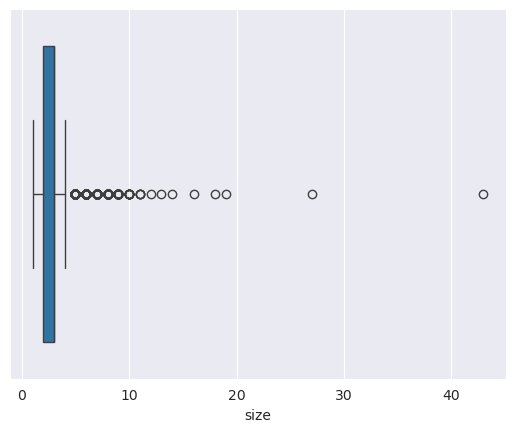

In [113]:
# e)
sns.boxplot(x=df['size'])

In [114]:
lst = ['price_per_sqft', 'size']
for col in lst:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

<Axes: xlabel='size'>

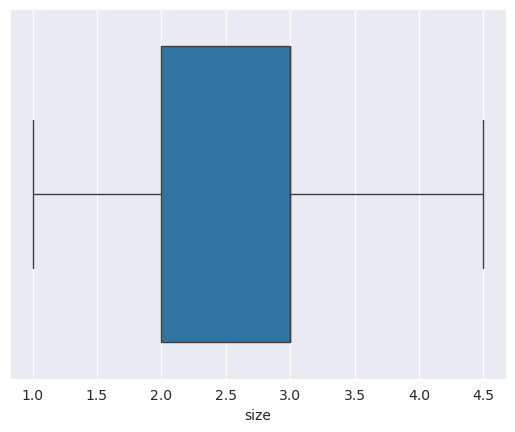

In [115]:
sns.boxplot(x=df['size'])

In [121]:
# f)
x = df.drop(columns=['price', 'location'])
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)

print("mean-sq.acc = ", mse)
print("accuracy = ", accuracy)


mean-sq.acc =  7251.882313722856
accuracy =  0.6593847334151042


In [ ]:
# mean-sq.error: The average squared difference between actual and predicted values
# r2 : How well does my model fit the data 0 <= r2 <= 1